In [26]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras 
from sklearn.utils import shuffle

In [8]:
#read the dataset 
data = pd.read_csv("../../sep19SexAndAgeAddedFINAL DATASET_ver2.txt", sep=",")


# add Class to the dataset
_class = []
for i in range(data.shape[0]):
    if((data.L102900[i] <= 200) & (data.L103200[i] <= 130) & (data.L103000[i] <=150)):
        _class.append(0)
    else:
        _class.append(1)
data["CLASS"] = _class


# filter the data set
data = data[data.FIELD_16 != 1]  # exclude people who are diagnosed for (diabetes)
data = data[data.FIELD_23 != 1]  # exclude people who are on medication for diabetes

data = data[
    data.FIELD_15 != 1
]  # exclude people who are diagnosed for (high blood pressure)
data = data[
    data.FIELD_22 != 1
]  # exclude people who are on medication for high blood pressure

data = data[data.FIELD_17 != 1]  # exclude people who are diagnosed for hyperlipidemia
data = data[
    data.FIELD_24 != 1
]  # exclude people who are on medication for hyperlipidemia

data = data[data.FIELD_13 != 1]  
data = data[data.FIELD_20 != 1]  

print(data.shape)

(465879, 407)


In [9]:

# rename columns
data.rename(
    columns={
        "L104600": "HBA1C",
        "L103000": "Triglycerides",
        "L100800": "fasting glucose",
        "S000300": "BMI",
        "S000501": "SBP",
        "S000502": "DBP",
        "L101700": "r-GTP gamma",
        "L103300": "Cardiac risk factor",
        "L190400": "Hemoglobin",
        "L190500": "HCT",
        "L100700": "Uric Acid",
        "L101300": "SGPT",
        "L190300": "RBC",
        "L102900": "total cholesterol",
        "L103100": "HDL-Cholesterol",
    },
    inplace=True,
)
mydata = data.rename(
    columns={
        "FIELD_33": "_4_1_Smoking",
        "FIELD_38": "Drinking_5_1_days",
        "FIELD_40": "_6_1_of_physical_activity_high_strength",
        "FIELD_31": "Family_history",
        "FIELD_41": "_6_2_of_physical_activity_moderate",
        "FIELD_27": "_2_family_history_stroke",
        "FIELD_21": "_1_medication_heart_disease",
        "FIELD_14": "Whether_one_diagnosis_disease",
        "FIELD_32": "_3B_hepatitis",
        "FIELD_42": "_6_3_of_physical_activity_walking",
        "FIELD_4": "blood_type",
        "FIELD_29": "_2_family_history_hypertension",
        "FIELD_3": "Blood_factor_RH_factor",
        "FIELD_19": "_1_drug_therapy_stroke",
    },
    inplace=True,
)


In [48]:
finalFeatures = ['AGE', 'BMI', 'Uric Acid', 'fasting glucose','L100100','SBP','DBP','L100200','SGPT', 
                 'L190000','L100400','r-GTP gamma', 'RBC', 'HCT','Hemoglobin', 'L101600', 'L105200', 
                 'CLASS']

In [49]:
randomseed = 7
mydata = data[finalFeatures].copy().dropna()
print(mydata.shape)
mydata.head()

(425698, 18)


,AGE,BMI,Uric Acid,fasting glucose,L100100,SBP,DBP,L100200,SGPT,L190000,L100400,r-GTP gamma,RBC,HCT,Hemoglobin,L101600,L105200,CLASS
2,48.0,24.3,2.6,113.0,6.7,132.0,85.0,4.3,15.0,4.08,16.5,36.0,4.24,40.7,13.4,42.0,75.0,0
3,49.0,24.3,2.0,105.0,6.9,140.0,80.0,4.5,15.0,5.19,11.4,39.0,4.28,41.1,13.8,53.0,84.0,0
4,50.0,23.7,2.8,118.0,7.0,145.0,90.0,4.6,12.0,3.44,12.6,24.0,4.34,40.4,13.7,49.0,84.0,1
5,46.0,22.9,4.2,93.0,7.3,123.0,84.0,4.2,21.0,7.23,14.2,22.0,4.30,33.6,10.4,48.0,71.0,0
6,49.0,21.2,5.1,87.0,6.5,112.0,68.0,4.5,32.0,3.59,15.4,36.0,4.72,44.9,15.1,93.0,75.0,1


In [50]:
class1 = mydata[mydata.CLASS == 1]
class0 = mydata[mydata.CLASS == 0]

print(class1.shape[0],class0.shape[0],)

class1_test = class1.sample(10000, random_state=randomseed)
class0_test = class0.sample(10000, random_state=randomseed)
test = pd.concat([class1_test, class0_test])
test=shuffle(test)


class1_train = class1.drop(class1_test.index) #.sample( class2_train.shape[0], random_state=randomseed)
class0_train = class0.drop(class0_test.index) #.sample( class2_train.shape[0], random_state=randomseed)
train = pd.concat([class1_train, class0_train])
train=shuffle(train)

219435 206263


In [51]:
train.head()

,AGE,BMI,Uric Acid,fasting glucose,L100100,SBP,DBP,L100200,SGPT,L190000,L100400,r-GTP gamma,RBC,HCT,Hemoglobin,L101600,L105200,CLASS
256604,37.0,27.1,7.9,89.0,6.9,125.0,77.0,4.7,38.0,4.48,13.1,85.0,4.92,45.6,15.4,42.0,72.0,1
135816,34.0,21.3,3.9,93.0,8.0,109.0,67.0,4.5,10.0,5.27,9.0,11.0,4.38,38.3,13.0,62.0,121.0,1
174720,44.0,27.4,4.0,86.0,7.3,128.0,81.0,4.5,40.0,6.92,11.9,101.0,4.89,46.2,15.7,52.0,69.0,1
435039,38.0,24.2,6.5,99.0,7.1,123.0,75.0,4.5,27.0,5.40,19.4,36.0,5.05,47.3,15.9,56.0,79.0,0
858,47.0,20.7,5.1,96.0,7.4,115.0,72.0,4.3,12.0,4.49,14.0,17.0,4.97,45.1,14.7,50.0,85.0,0


In [62]:
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dropout
from tensorflow.python.keras.layers import Dense

In [ ]:
from sklearn.preprocess

In [70]:
model = Sequential()

model.add(Dense(512, input_dim=17, kernel_initializer='normal', activation='relu'))
model.add(Dense(512, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization( )) 

model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dense(128, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization( )) 

model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization( )) 

model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization( )) 

model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dense(16, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization( )) 

model.add(Dense(8, kernel_initializer='normal', activation='relu'))
model.add(Dense(4, kernel_initializer='normal', activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization( )) 

model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

In [72]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
history=model.fit(train.iloc[:,:-1], train.CLASS, epochs=100, batch_size=100,validation_split=.2)

W1204 19:23:15.778269 25888 training.py:504] Falling back from v2 loop because of error: Failed to find data adapter that can handle input: <class 'pandas.core.frame.DataFrame'>, <class 'NoneType'>


Train on 324558 samples, validate on 81140 samples
Epoch 1/100
324558/324558 [==============================] - 35s 109us/sample - loss: 0.6146 - accuracy: 0.6722 - val_loss: 0.6825 - val_accuracy: 0.5705
Epoch 2/100
324558/324558 [==============================] - 34s 104us/sample - loss: 0.6086 - accuracy: 0.6777 - val_loss: 0.7800 - val_accuracy: 0.5336
Epoch 3/100
324558/324558 [==============================] - 34s 105us/sample - loss: 0.6044 - accuracy: 0.6807 - val_loss: 0.7416 - val_accuracy: 0.5414
Epoch 4/100
324558/324558 [==============================] - 34s 105us/sample - loss: 0.6023 - accuracy: 0.6824 - val_loss: 0.6405 - val_accuracy: 0.6279
Epoch 5/100
324558/324558 [==============================] - 34s 105us/sample - loss: 0.6015 - accuracy: 0.6832 - val_loss: 0.8371 - val_accuracy: 0.5022
Epoch 6/100
324558/324558 [==============================] - 34s 104us/sample - loss: 0.6006 - accuracy: 0.6841 - val_loss: 0.8571 - val_accuracy: 0.4996
Epoch 7/100
324558/324558

324558/324558 [==============================] - 33s 101us/sample - loss: 0.5946 - accuracy: 0.6886 - val_loss: 0.7662 - val_accuracy: 0.5328
Epoch 54/100
324558/324558 [==============================] - 33s 102us/sample - loss: 0.5947 - accuracy: 0.6878 - val_loss: 0.7324 - val_accuracy: 0.5200
Epoch 55/100
324558/324558 [==============================] - 33s 103us/sample - loss: 0.5948 - accuracy: 0.6883 - val_loss: 0.7314 - val_accuracy: 0.5349
Epoch 56/100
324558/324558 [==============================] - 33s 102us/sample - loss: 0.5946 - accuracy: 0.6885 - val_loss: 0.7233 - val_accuracy: 0.5111
Epoch 57/100
324558/324558 [==============================] - 33s 102us/sample - loss: 0.5940 - accuracy: 0.6883 - val_loss: 0.6922 - val_accuracy: 0.5709
Epoch 58/100
324558/324558 [==============================] - 33s 101us/sample - loss: 0.5944 - accuracy: 0.6878 - val_loss: 0.7058 - val_accuracy: 0.5485
Epoch 59/100
324558/324558 [==============================] - 33s 101us/sample - lo

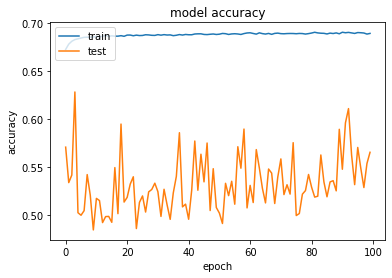

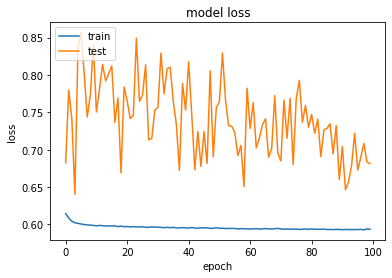

In [76]:
from matplotlib import pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()